**Лабораторная работа №1**

In [1]:
import numpy as np # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
plt.style.use('default')

**Описание задачи:**

 Данными для задачи является набор объявлений о продаже 51783  автомобилей Ford на территории США в районе Айовы. Данные собранны в декабре 2018 года и  взяты с сайиа Cars.com.
 
 Постановка задачи:
 
 С помощью методов машинного обучения, научить модель определять drivetrain - тип трансмиссии.
 
  
**Типы трансмисии:**

4WD - 

FWD -

RWD -

AWD -

Four Wheel Drive -



**Загружаем данные:**

In [2]:
url = "https://raw.githubusercontent.com/SlavikLenkin/MachineLearning/main/carData.csv"
full_data = pd.read_csv(url)# Читаем данные

In [3]:
full_data.shape 

(51783, 13)

Отображаем первые строки таблицы (по умолчанию 5):

In [4]:
full_data.head()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
0,"$25,290",6 miles,Hybrid,Oxford White,Charcoal Black,FWD,CVT,4 Cylinder,1FADP5AU6JL100444,New 2018 Ford C-Max Hybrid SE,"2406 N Jefferson Way, Indianola, IA 50125",719242528,C-Max Hybrid
1,"$12,988","51,713 miles",Hybrid,Gray,Charcoal Black,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5BUXDL528553,Used 2013 Ford C-Max Hybrid SEL,"2020 W 20th St S, Newton, IA 50208",753737631,C-Max Hybrid
2,"$25,995",10 miles,Hybrid,White,Black,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5BU7GL115512,New 2016 Ford C-Max Hybrid SEL,"916 W St S, Grinnell, IA 50112",675439230,C-Max Hybrid
3,"$20,225","2,022 miles",Hybrid,Magnetic Metallic,Charcoal Black,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5AUXJL105758,New 2018 Ford C-Max Hybrid SE,"600 Brooks Rd, Iowa Falls, IA 50126",738620869,C-Max Hybrid
4,"$9,413","48,164 miles",Hybrid,Oxford White,Medium Light Stone/Medium Dark Stone,FWD,AUTOMATIC,4 Cylinder Engine 2.0L,1FADP5AU3DL540626,Used 2013 Ford C-Max Hybrid SE,"215 15th St SW, Mason City, IA 50401",754880903,C-Max Hybrid


Отображаем последние строки таблицы (по умолчанию 5):

In [5]:
full_data.tail()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
51778,"$54,793",NaN,Diesel,Shadow Black,Medium Earth Gray,4WD,6-Speed Automatic,6.7L V8 32V DDI OHV Turbo Diesel,1FT7W2BT9JEC40281,New 2018 Ford F-250 XLT,"2860 S Noland Rd, Independence, MO 64055",751165085,F-250
51779,"$64,711",NaN,Diesel,Magnetic,Black,4WD,6-Speed Automatic,6.7L V8 32V DDI OHV Turbo Diesel,1FT7W2BT5JEC07424,New 2018 Ford F-250 Lariat,"2860 S Noland Rd, Independence, MO 64055",737236411,F-250
51780,"$19,545","50,376 miles",E85 Flex Fuel,Oxford White,Steel,RWD,TorqShift 6-Speed Automatic,6.2L V8 EFI SOHC 16V Flex Fuel,1FDBF2A65DEB65326,Used 2013 Ford F-250 XL,"2245 SW Topeka Blvd, Topeka, KS 66611",749747000,F-250
51781,"$58,987","19,189 miles",Diesel,Ingot Silver Metallic,Black,4WD,TorqShift 6-Speed Automatic,Power Stroke 6.7L V8 DI 32V OHV Turbodiesel,1FT7W2BT9HEF37240,Used 2017 Ford F-250 Lariat,"2245 SW Topeka Blvd, Topeka, KS 66611",756269741,F-250
51782,"$22,987","106,446 miles",E85 Flex Fuel,Oxford White,Steel,4 WHEEL,AUTOMATIC,6.2L 8 CYL. FLEX FUEL,1FT7W2B69DEA17804,Used 2013 Ford F-250 XLT,"1500 NW S Outer Rd, Blue Springs, MO 64015",756360809,F-250


**Обзор данных и их типов:**
1. price - цена автомобиля,количественный
2. miles - пробег,количественный
3. fuel_type - тип топлива,номинальный
4. exterior_color - цвет кузова,номинальный
5. interior_color - цвет салона,номинальный
6. drivetrain - тип трансмиссии,номинальный
7. transmission - тип коробки передач,номинальный
8. engine - тип дивигателя,номинальный
9. VIN - уникальный идентификационный номер машины,номинальный
10. name - названи машины,номинальный
11. sellerAddress - адресс продавца,номинальный
12. id - уникальный номер объявления,номинальный
13. modelName - название модели,номинальный



In [6]:
full_data.columns

Index(['price', 'miles', 'fuel_type', 'exterior_color', 'interior_color',
       'drivetrain', 'transmission', 'engine', 'VIN', 'name', 'sellerAddress',
       'id', 'modelName'],
      dtype='object')

**Диапазоны индексов:**

In [7]:
full_data.index

RangeIndex(start=0, stop=51783, step=1)

**Достпук к отдельным элементам и выделение подтаблиц(slice):**

In [8]:
full_data.at[3, 'fuel_type']

' Hybrid'

In [9]:
full_data.loc[3, 'fuel_type']

' Hybrid'

In [10]:
full_data.iat[3, 2]

' Hybrid'

In [11]:
full_data.iloc[3, 2]

' Hybrid'

**Подтаблицы:**

In [12]:
full_data.loc[[13,123,414,2222],['fuel_type','engine','transmission']]

,fuel_type,engine,transmission
13,Hybrid,I4 Hybrid,CVT
123,Gasoline,4.0L V6,Automatic 4-Speed
414,Gasoline,Regular Unleaded V-8 5.0 L/302,10-Speed Automatic w/OD
2222,E85 Flex Fuel,2.5L 4 cyls,Automatic 6-Speed


In [13]:
full_data.iloc[[13,123,414,2222],[2,6,7]]

,fuel_type,transmission,engine
13,Hybrid,CVT,I4 Hybrid
123,Gasoline,Automatic 4-Speed,4.0L V6
414,Gasoline,10-Speed Automatic w/OD,Regular Unleaded V-8 5.0 L/302
2222,E85 Flex Fuel,Automatic 6-Speed,2.5L 4 cyls


In [14]:
full_data.loc[[13,123,414,2222],['fuel_type','engine','transmission']].loc[123,'transmission']

' Automatic 4-Speed'

In [15]:
full_data.iloc[[13,123,414,2222],[2,6,7]].iloc[1,1]

' Automatic 4-Speed'

**Целые строки и столбцы:**

In [16]:
full_data.loc[:,['fuel_type','engine','transmission']]

,fuel_type,engine,transmission
0,Hybrid,4 Cylinder,CVT
1,Hybrid,2.0L I4 16V MPFI DOHC Hybrid,Automatic CVT
2,Hybrid,2.0L I4 16V MPFI DOHC Hybrid,Automatic CVT
3,Hybrid,2.0L I4 16V MPFI DOHC Hybrid,Automatic CVT
4,Hybrid,4 Cylinder Engine 2.0L,AUTOMATIC
...,...,...,...
51778,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic
51779,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic
51780,E85 Flex Fuel,6.2L V8 EFI SOHC 16V Flex Fuel,TorqShift 6-Speed Automatic
51781,Diesel,Power Stroke 6.7L V8 DI 32V OHV Turbodiesel,TorqShift 6-Speed Automatic


In [17]:
full_data.loc[[12,10000],:]

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
12,"$12,494","53,513 miles",Hybrid,White,Medium Light Stone,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5AU0FL123175,Used 2015 Ford C-Max Hybrid SE,"6345 N 28th St, Lincoln, NE 68504",750700942,C-Max Hybrid
10000,"$28,245",5 miles,Gasoline,White Platinum Tri-Coat Metallic,Ebony,FWD,6-Speed Automatic,1.5L I4 16V GDI DOHC Turbo,3FA6P0CDXKR133426,New 2019 Ford Fusion SEL,"3200 S. Outer Rd, Blue Springs, MO 64015",753582800,Fusion


In [18]:
full_data['fuel_type']

0                Hybrid
1                Hybrid
2                Hybrid
3                Hybrid
4                Hybrid
              ...      
51778            Diesel
51779            Diesel
51780     E85 Flex Fuel
51781            Diesel
51782     E85 Flex Fuel
Name: fuel_type, Length: 51783, dtype: object

In [19]:
full_data[['fuel_type','engine']]

,fuel_type,engine
0,Hybrid,4 Cylinder
1,Hybrid,2.0L I4 16V MPFI DOHC Hybrid
2,Hybrid,2.0L I4 16V MPFI DOHC Hybrid
3,Hybrid,2.0L I4 16V MPFI DOHC Hybrid
4,Hybrid,4 Cylinder Engine 2.0L
...,...,...
51778,Diesel,6.7L V8 32V DDI OHV Turbo Diesel
51779,Diesel,6.7L V8 32V DDI OHV Turbo Diesel
51780,E85 Flex Fuel,6.2L V8 EFI SOHC 16V Flex Fuel
51781,Diesel,Power Stroke 6.7L V8 DI 32V OHV Turbodiesel


**Доступ по булевой майске**

In [20]:
df= full_data.iloc[4702:4709,:4]
df

,price,miles,fuel_type,exterior_color
4702,"$23,395","10,393 miles",Gasoline,Summit White
4703,"$54,647",10 miles,Diesel,Brilliant Black Crystal Pearlcoat
4704,"$8,488","213,601 miles",Unknown,White
4705,"$2,500","211,853 miles",Gasoline,Blue
4706,"$9,950","6,165 miles",Diesel,Red
4707,"$29,869",4 miles,Compressed Natural Gas,Summit White
4708,"$17,288","86,729 miles",Gasoline,Bright Silver


In [21]:
df.loc[[False, True, False, True, False, True, False], [False, True, True, False]] # или iloc

,miles,fuel_type
4703,10 miles,Diesel
4705,"211,853 miles",Gasoline
4707,4 miles,Compressed Natural Gas


In [22]:
df.loc[[False, True, True, True, True, False, False]] # или iloc

,price,miles,fuel_type,exterior_color
4703,"$54,647",10 miles,Diesel,Brilliant Black Crystal Pearlcoat
4704,"$8,488","213,601 miles",Unknown,White
4705,"$2,500","211,853 miles",Gasoline,Blue
4706,"$9,950","6,165 miles",Diesel,Red


In [23]:
df.loc[df.exterior_color == ' Red',  ]

,price,miles,fuel_type,exterior_color
4706,"$9,950","6,165 miles",Diesel,Red


**Обзор данных:**
    
С помощью метода Dataframe.describe() библиотеки pandas, осмотрим наши столбцы данных на наличе пустых столбов, аномалий или закономерностей

**Для номинальных признаков**
count - количество значений

unique - количество уникальных значений в каждом столбце

top - самое распространенное значение

freq - частота наиболее распространенного значения

**Для количественных признаков:**
mean - Среднее арифметическое

std - Стандартное отклонение

min - Минимальное значение

25% - Квартиль уровня (1/4)

50% - Медиана

75% - Квартиль уровня (3/4)

max - Максимальное значение

In [24]:
full_data.iloc[:,:13].describe(include="all")

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
count,50987,42301,51655,50885,45102,48653,49856,49340,51526,51657,51517,5.178300e+04,51783
unique,23114,18609,7,1124,1268,66,343,1493,50839,3299,2468,NaN,41
top,"$13,995",5 miles,Gasoline,Shadow Black,Charcoal Black,4WD,6-Speed Automatic,3.5L V6 24V MPFI DOHC,3FA6P0LU8HR380758,New 2018 Ford F-150 XLT,"900 Bernadette Dr, Columbia, MO 65203",NaN,F-150
freq,107,3582,38282,5387,8720,17845,20154,2863,8,2080,708,NaN,4742
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.472646e+08,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459627e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.648982e+06,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.447334e+08,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.508864e+08,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.540559e+08,NaN


Самое встречаемое значение наших классов состояния машин - 4WD, количество непропущенных строк даных - 48653, а частота входжения - 17845, что составляет - 34% значений всего класса, а значит наши классы по этому столбцу - сбалансированны (при условии что баланс считаем нарушенным если, один класс занимает более 75% от класса)

**Визуализация данных и описательная статистика**

Рассмотрим диаграмму по двум количественным признакам - цене от пробегу автомобиля, предполагаем что эти данные зависимы т.к с ростом пробега, будет уменьшатся цена автомобиля

Сначала нам необходимо очистить данные в колонках miles и price от "$" и "miles"


Создадим новую таблицу full_dataC там и будем производить очистку

In [25]:
delete_data = full_data.copy()
delete_data.dropna(inplace=True)
delete_data.shape

(35113, 13)

In [26]:
import re
full_dataC = delete_data.copy()
for  row in range(35113):
    full_dataC.iloc[row,0] =re.sub("\D", "",str(full_dataC.iloc[row,0]))
    full_dataC.iloc[row,1] =re.sub("\D", "",str(full_dataC.iloc[row,1]))

In [44]:
full_dataC['miles'] =pd.to_numeric(full_dataC['miles'],downcast='float')
full_dataC['price'] =pd.to_numeric(full_dataC['price'],downcast='float')

Убедимся в результате:

In [40]:
full_dataC.head()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
0,25290,6,Hybrid,Oxford White,Charcoal Black,FWD,CVT,4 Cylinder,1FADP5AU6JL100444,New 2018 Ford C-Max Hybrid SE,"2406 N Jefferson Way, Indianola, IA 50125",719242528,C-Max Hybrid
1,12988,51713,Hybrid,Gray,Charcoal Black,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5BUXDL528553,Used 2013 Ford C-Max Hybrid SEL,"2020 W 20th St S, Newton, IA 50208",753737631,C-Max Hybrid
2,25995,10,Hybrid,White,Black,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5BU7GL115512,New 2016 Ford C-Max Hybrid SEL,"916 W St S, Grinnell, IA 50112",675439230,C-Max Hybrid
3,20225,2022,Hybrid,Magnetic Metallic,Charcoal Black,FWD,Automatic CVT,2.0L I4 16V MPFI DOHC Hybrid,1FADP5AUXJL105758,New 2018 Ford C-Max Hybrid SE,"600 Brooks Rd, Iowa Falls, IA 50126",738620869,C-Max Hybrid
4,9413,48164,Hybrid,Oxford White,Medium Light Stone/Medium Dark Stone,FWD,AUTOMATIC,4 Cylinder Engine 2.0L,1FADP5AU3DL540626,Used 2013 Ford C-Max Hybrid SE,"215 15th St SW, Mason City, IA 50401",754880903,C-Max Hybrid


In [29]:
full_dataC.tail()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
51776,47946,48741,Diesel,White,Adobe,4WD,Automatic,6.7 L,1FT7W2BT0FED16087,Used 2015 Ford F-250 King Ranch,"3450 S 9th St, Salina, KS 67401",756449725,F-250
51777,56973,2,Diesel,Ruby Red,Medium Earth Gray,4WD,6-Speed Automatic,6.7L V8 32V DDI OHV Turbo Diesel,1FT7W2BT6KEC23391,New 2019 Ford F-250 XLT,"2502 Cantrell Rd, Harrisonville, MO 64701",745041916,F-250
51780,19545,50376,E85 Flex Fuel,Oxford White,Steel,RWD,TorqShift 6-Speed Automatic,6.2L V8 EFI SOHC 16V Flex Fuel,1FDBF2A65DEB65326,Used 2013 Ford F-250 XL,"2245 SW Topeka Blvd, Topeka, KS 66611",749747000,F-250
51781,58987,19189,Diesel,Ingot Silver Metallic,Black,4WD,TorqShift 6-Speed Automatic,Power Stroke 6.7L V8 DI 32V OHV Turbodiesel,1FT7W2BT9HEF37240,Used 2017 Ford F-250 Lariat,"2245 SW Topeka Blvd, Topeka, KS 66611",756269741,F-250
51782,22987,106446,E85 Flex Fuel,Oxford White,Steel,4 WHEEL,AUTOMATIC,6.2L 8 CYL. FLEX FUEL,1FT7W2B69DEA17804,Used 2013 Ford F-250 XLT,"1500 NW S Outer Rd, Blue Springs, MO 64015",756360809,F-250


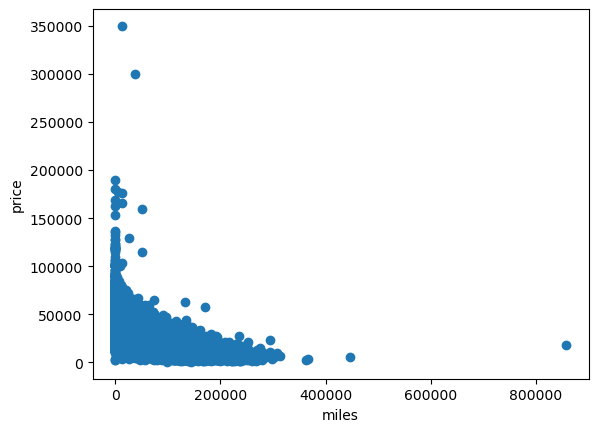

In [30]:
plt.scatter(full_dataC['miles'], full_dataC['price']) 
plt.xlabel('miles')
plt.ylabel('price')
pass

Видим большие выбросы, не дающие адекватно рассмотреть диаграмму рассеивания от наших двух признаков, попробуем рассмотреть диаграмму на рандомной выборке для 1000 объектов

In [31]:
full_dataC['price'].describe()


count     35113.000000
mean      29347.996013
std       15990.820816
min         500.000000
25%       17804.000000
50%       25700.000000
75%       38136.000000
max      349900.000000
Name: price, dtype: float64

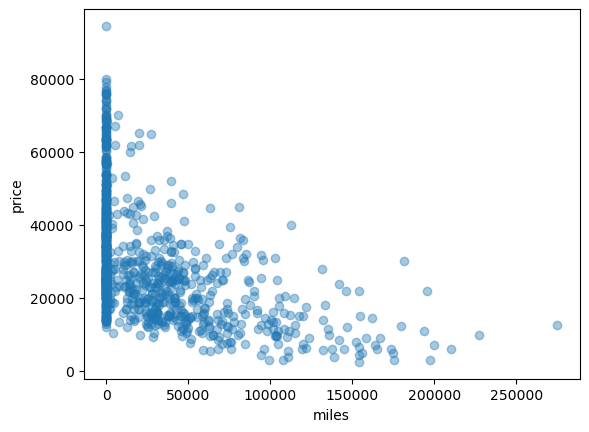

In [32]:
 np.random.seed(73)
random_subset = np.random.choice(np.arange(full_dataC.shape[0]), size=1000, replace=False)

plt.scatter(full_dataC.iloc[random_subset]['miles'], full_dataC.iloc[random_subset]['price'], alpha=0.4)
plt.xlabel('miles')
plt.ylabel('price')
pass

**Обработка выбросов**

Для обнаружения выбросов найдем, квантили для признаков miles и price

In [46]:
full_dataC['price'].quantile([0.005,.01,.05,.080,.09,.1,.5,.9,.95,.99,.995])

0.005     3495.00
0.010     4497.00
0.050     8995.00
0.080    11404.96
0.090    11995.00
0.100    12591.40
0.500    25700.00
0.900    50738.00
0.950    60915.00
0.990    75119.36
0.995    79607.00
Name: price, dtype: float64

In [45]:
full_dataC['price'].max()

349900.0

In [47]:
full_dataC['miles'].quantile([0.005,.01,.05,.080,.09,.1,.5,.9,.95,.99,.995])

0.005         1.00
0.010         1.00
0.050         2.00
0.080         3.00
0.090         3.00
0.100         3.00
0.500        56.00
0.900     81585.20
0.950    115743.60
0.990    180788.64
0.995    203465.76
Name: miles, dtype: float64

In [36]:
full_dataC['miles'].max()

856765

Создадим новую переменную clear_data - куда занесем только очищенные данные

In [63]:
x=full_dataC['price'].to_numpy()

In [64]:
x

array([25290., 12988., 25995., ..., 19545., 58987., 22987.], dtype=float32)

In [107]:
rows_to_drop = full_dataC[
    (full_dataC['price'] < full_dataC['price'].quantile(0.005)) | (full_dataC['price'] > full_dataC['price'].quantile(0.995)) | 
    (full_dataC['miles']  < full_dataC['miles'].quantile(0.500)) | (full_dataC['miles']  > full_dataC['miles'].quantile(0.995))].index
clear_data = full_dataC.drop(rows_to_drop)


clear_data.shape

(17220, 13)

Построим все возможные диаграммы рассеивания для каждой пары переменных, на небольшой выборке:

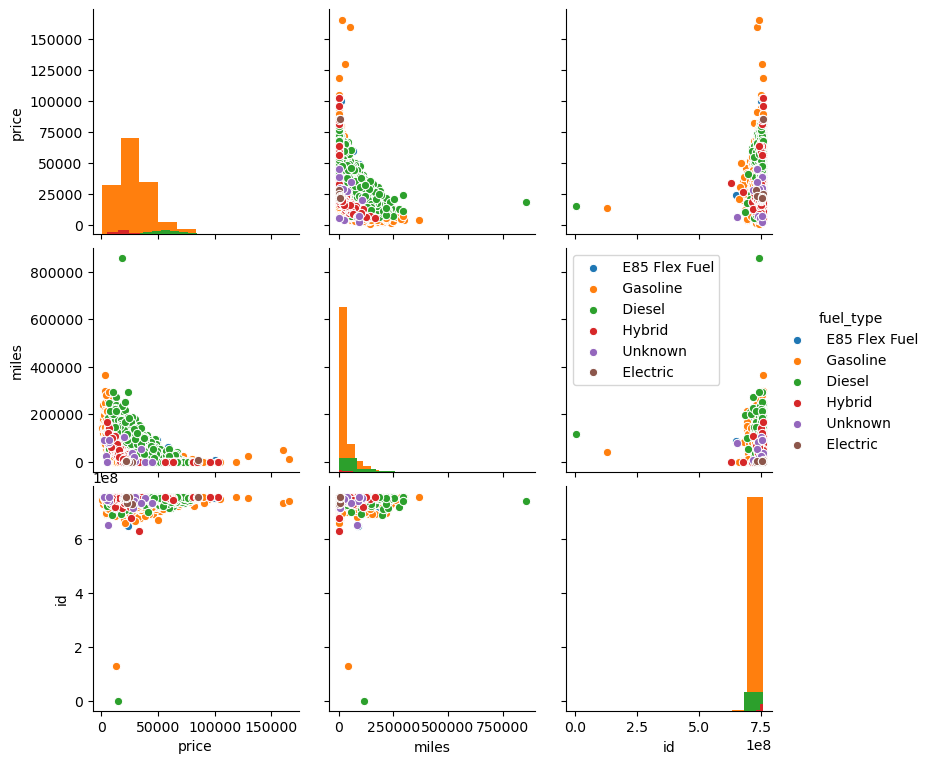

In [66]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(full_dataC.shape[0]), size=10000, replace=False)
sns.pairplot(full_dataC.iloc[random_subset], hue='fuel_type', diag_kind='hist')
plt.legend()
pass

Гистограммы можно построить отдельно. Построить гистограмму можно с помощью функции plt.hist, но мы воспользуемся distplot из библиотеки seaborn.

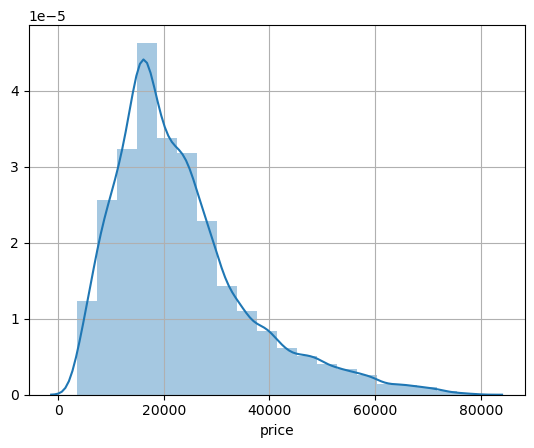

In [109]:
sns.distplot(clear_data['price'], bins=20)
plt.grid()
pass

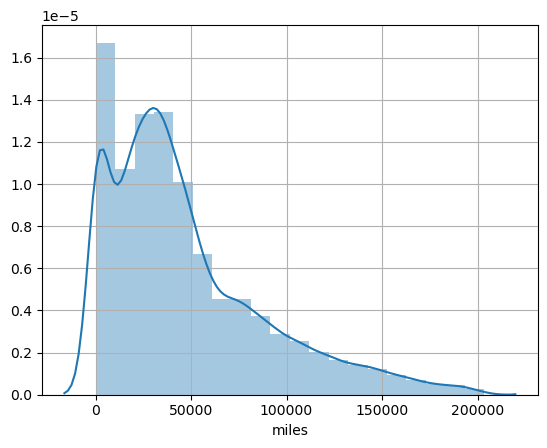

In [108]:
sns.distplot(clear_data['miles'], bins=20)
plt.grid()
pass

**Количественные признаки**

Для более полного анализа данных, построим кореляционную матрицу и оценим степень зависимости количественных признаков друг от друга

In [74]:
corr_mat = full_dataC.corr()
corr_mat

,price,miles,id
price,1.000000,-0.471903,0.033061
miles,-0.471903,1.000000,0.099899
id,0.033061,0.099899,1.000000


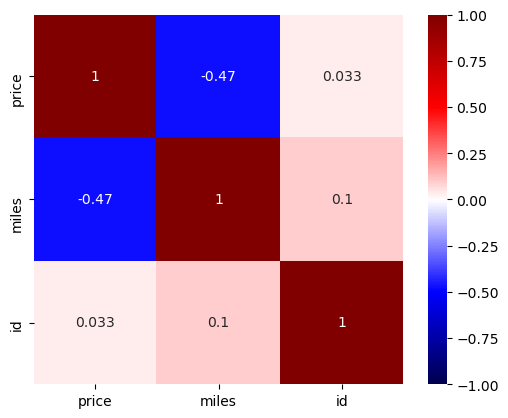

In [75]:
sns.heatmap(corr_mat, square=True, cmap='seismic', annot = True, vmin=-1, vmax=1, center= 0)
pass

In [76]:
corr_mat.where(np.triu(corr_mat > 0.2, k=1) | np.triu(corr_mat < -0.2, k=1)).stack().sort_values(ascending=False)

price  miles   -0.471903
dtype: float64

Корреляция наблюдается у 2-х пар признаков: price и miles

**Обработка категореальных признаков**

In [83]:
import copy
predict_data = copy.deepcopy(full_dataC)

In [85]:
full_dataC.tail()

,price,miles,fuel_type,exterior_color,interior_color,drivetrain,transmission,engine,VIN,name,sellerAddress,id,modelName
51776,47946.0,48741.0,Diesel,White,Adobe,4WD,Automatic,6.7 L,1FT7W2BT0FED16087,Used 2015 Ford F-250 King Ranch,"3450 S 9th St, Salina, KS 67401",756449725,F-250
51777,56973.0,2.0,Diesel,Ruby Red,Medium Earth Gray,4WD,6-Speed Automatic,6.7L V8 32V DDI OHV Turbo Diesel,1FT7W2BT6KEC23391,New 2019 Ford F-250 XLT,"2502 Cantrell Rd, Harrisonville, MO 64701",745041916,F-250
51780,19545.0,50376.0,E85 Flex Fuel,Oxford White,Steel,RWD,TorqShift 6-Speed Automatic,6.2L V8 EFI SOHC 16V Flex Fuel,1FDBF2A65DEB65326,Used 2013 Ford F-250 XL,"2245 SW Topeka Blvd, Topeka, KS 66611",749747000,F-250
51781,58987.0,19189.0,Diesel,Ingot Silver Metallic,Black,4WD,TorqShift 6-Speed Automatic,Power Stroke 6.7L V8 DI 32V OHV Turbodiesel,1FT7W2BT9HEF37240,Used 2017 Ford F-250 Lariat,"2245 SW Topeka Blvd, Topeka, KS 66611",756269741,F-250
51782,22987.0,106446.0,E85 Flex Fuel,Oxford White,Steel,4 WHEEL,AUTOMATIC,6.2L 8 CYL. FLEX FUEL,1FT7W2B69DEA17804,Used 2013 Ford F-250 XLT,"1500 NW S Outer Rd, Blue Springs, MO 64015",756360809,F-250


In [87]:
predict_data['fuel_type'].value_counts()

 Gasoline                  26777
 E85 Flex Fuel              4981
 Diesel                     2392
 Hybrid                      899
 Unknown                      41
 Electric                     22
 Compressed Natural Gas        1
Name: fuel_type, dtype: int64

In [90]:
predict_data['exterior_color'].value_counts()

 Shadow Black                                                       4098
 Oxford White                                                       3751
 White                                                              1838
 Magnetic                                                           1706
 Magnetic Metallic                                                  1592
                                                                    ... 
 White (Super Low Miles Only 79,200 Miles & Anniversary Edition)       1
 Phantom Gray                                                          1
 Violet Grey Metallic                                                  1
 Blue Candy Metallic Tinted                                            1
 Crystal Metallic                                                      1
Name: exterior_color, Length: 843, dtype: int64

In [92]:
predict_data['sellerAddress'].value_counts()

4501 South 4th Trafficway, Leavenworth, KS 66048    618
900 Bernadette Dr, Columbia, MO 65203               515
9401 N Milwaukee Ave, Niles, IL 60714               467
2303 W. Beltline Highway, Madison, WI 53713         367
9423 W Lincoln Hwy, Frankfort, IL 60423             326
                                                   ... 
7980 Wallace Rd, Eden Prairie, MN 55344               1
2490 W Maplewood Dr, Maplewood, MN 55109              1
1385 East Chicago Street, Elgin, IL 60120             1
1765 Park Ave, Plover, WI 54467                       1
4000 N Frontage Rd, Sheboygan, WI 53081               1
Name: sellerAddress, Length: 1927, dtype: int64

In [94]:
predict_data['name'].value_counts()

New 2018 Ford F-150 XLT                                                 1538
New 2018 Ford Focus SE                                                  1173
New 2018 Ford EcoSport SE                                                935
New 2018 Ford Explorer XLT                                               667
New 2018 Ford Escape SE                                                  579
                                                                        ... 
Used 2003 Ford E350 Super Duty HANDICAP WHEEL CHAIR VAN MOBILITY VAN       1
Used 2009 Ford F-250 Harley-Davidson                                       1
New 2017 Chevrolet 4500XD                                                  1
New 2016 Ford Taurus Limited                                               1
Certified 2017 Lexus GX 460 Premium                                        1
Name: name, Length: 2445, dtype: int64

In [96]:
predict_data['drivetrain'].value_counts()

 4WD                    12716
 FWD                    11952
 RWD                     4424
 AWD                     4007
 Four Wheel Drive         468
 Front Wheel Drive        436
 4X4                      237
 Rear Wheel Drive         168
 All Wheel Drive          131
 4WD/AWD                   89
 2WD                       87
 4x4                       56
 FOUR WHEEL DRIVE          48
 Front-wheel Drive         40
 Front                     34
 FRONT WHEEL DRIVE         34
 Automatic 6-Speed         31
 FRONT WHEEL               17
 ALL WHEEL DRIVE           16
 4 WHEEL                   14
 REAR WHEEL DRIVE          13
 4X2                       12
 4x2                        9
 4MATIC?                    8
 Rear-wheel Drive           8
 Automatic 4-Speed          5
 ALL WHEEL                  5
 REAR WHEEL                 5
 All-wheel Drive            5
 Rear                       4
 Manual 5-Speed             3
 quattro                    3
 Automatic 5-Speed          3
 CVT      

In [98]:
predict_data['transmission'].value_counts()

 6-Speed Automatic                       14929
 Automatic                                4028
 6-Speed Automatic w/OD                   2819
 10-Speed Automatic                       2477
 6-Speed Automatic with Auto-Shift        1291
                                         ...  
 6-SPEED AUTOMATIC W/OD & SELECTSHIFT        1
 44A                                         1
 Manual 4-Speed                              1
 3-Speed A/T                                 1
 Manual 10-Speed                             1
Name: transmission, Length: 228, dtype: int64

In [100]:
predict_data['engine'].value_counts()

 3.5L V6 24V MPFI DOHC              2135
 3.5L V6 24V GDI DOHC Twin Turbo    1555
 2.0L I4 16V GDI DOHC               1508
 2.0L I4 16V GDI DOHC Turbo         1476
 1.5L I4 16V GDI DOHC Turbo         1457
                                    ... 
 V8, 3.9L;                             1
 6.0L V8 Diesel                        1
 V6, Flex Fuel, 4.0 Liter              1
 Gas V6 4.3L/                          1
 2.0L Engine-Turbocharged              1
Name: engine, Length: 1125, dtype: int64

In [102]:
predict_data['interior_color'].value_counts()

 Charcoal Black                                          7141
 Ebony                                                   6245
 Black                                                   4454
 Ebony Black                                             2800
 Medium Earth Gray                                       2214
                                                         ... 
 Linen                                                      1
 Cb Cloth Charcoal                                          1
 Plat Black Leather 40/Cnsl/40 Black                        1
 Ebony Black/Copper Insert Leat                             1
 Activex Seating Material Medium Light Stone Interior       1
Name: interior_color, Length: 1044, dtype: int64

In [104]:
predict_data['modelName'].value_counts()

F-150                       3566
Escape                      3146
Explorer                    3084
Edge                        2836
Focus                       2808
Fusion                      2792
F-250                       2047
Mustang                     1948
EcoSport                    1659
Taurus                      1507
F-350                       1109
Expedition                  1101
Model Unknown               1004
Fiesta                       928
Transit Connect              866
Transit-250                  750
Flex                         728
Fusion Hybrid                567
Transit-350                  465
Expedition Max               459
Expedition EL                327
Transit-150                  228
Ranger                       195
Focus ST                     146
C-Max Hybrid                 117
Fusion Energi                 95
C-Max Energi                  93
Shelby GT350                  91
E350 Super Duty               87
Explorer Sport Trac           62
Thunderbir

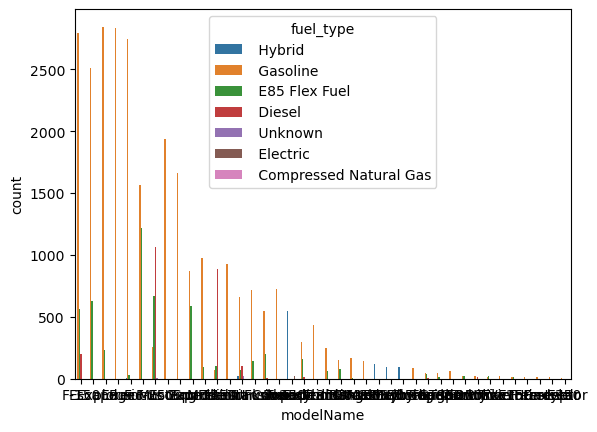

In [106]:
sns.countplot(x='modelName', order=clear_data['modelName'].value_counts().index, hue='fuel_type', data=clear_data)
pass